In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_excel(r'C:\Users\Hi\Desktop\covid19_clinical_dataset.xlsx') 
df 

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Predicting confirmed cases out of suspected cases

In [7]:
df=df.drop_duplicates()
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isna().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [9]:
df.isna().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

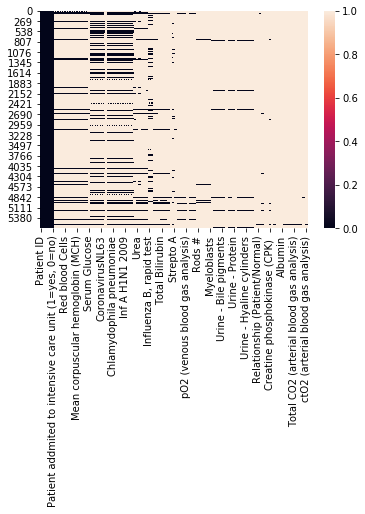

In [10]:
null=df.isnull()                      # Dataset is full of Null values
sns.heatmap(null)

In [11]:
df = df.fillna(method='bfill')
df                                                                          # Filling up Null values with Backward Fill method

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
2,a46b4402a0e5696,8,negative,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
3,f7d619a94f97c45,5,negative,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
4,d9e41465789c2b5,15,negative,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df = df.fillna(method='ffill')
df                                           # Filling up Null values with Forward Fill method

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
2,a46b4402a0e5696,8,negative,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
3,f7d619a94f97c45,5,negative,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
4,d9e41465789c2b5,15,negative,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5640,517c2834024f3ea,17,negative,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5641,5c57d6037fe266d,4,negative,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5642,c20c44766f28291,10,negative,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693


In [13]:
df.iloc[:,89]   

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5639   NaN
5640   NaN
5641   NaN
5642   NaN
5643   NaN
Name: Partial thromboplastin time (PTT) , Length: 5644, dtype: float64

In [14]:
df=df.drop(df.columns[89], axis = 1)  #Dropping a column having all Nan values

In [15]:
df.iloc[:,88:91]                            # checking whether the column is dropped or not

,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR)
0,light_yellow,-0.089481,0.296546
1,light_yellow,-0.089481,0.296546
2,light_yellow,-0.089481,0.296546
3,light_yellow,-0.089481,0.296546
4,light_yellow,-0.089481,0.296546
...,...,...,...
5639,yellow,-2.351347,0.522892
5640,yellow,-2.351347,0.522892
5641,yellow,-2.351347,0.522892
5642,yellow,-2.351347,0.522892


In [16]:
df=df.drop(['Prothrombin time (PT), Activity','D-Dimer','Urine - Sugar','Mycoplasma pneumoniae'],axis=1)  
df    # columns which are having all missing values

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
2,a46b4402a0e5696,8,negative,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
3,f7d619a94f97c45,5,negative,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
4,d9e41465789c2b5,15,negative,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5640,517c2834024f3ea,17,negative,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5641,5c57d6037fe266d,4,negative,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5642,c20c44766f28291,10,negative,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693


In [17]:
df=df.drop(['Patient ID'],axis=1)  
df  # column which is not required

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
2,8,negative,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
3,5,negative,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
4,15,negative,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5640,17,negative,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5641,4,negative,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5642,10,negative,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693


In [18]:
df=df[[i for i in df if len(set(df[i]))>1]]
df  # dropping columns with constant same values 

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
2,8,negative,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
3,5,negative,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
4,15,negative,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5640,17,negative,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5641,4,negative,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5642,10,negative,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693


In [19]:
df

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
2,8,negative,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
3,5,negative,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
4,15,negative,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5640,17,negative,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5641,4,negative,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5642,10,negative,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693


In [20]:
from sklearn.preprocessing import LabelEncoder                                      # Applying Label Encoder
lb=LabelEncoder()
df['SARS-Cov-2 exam result']=pd.DataFrame(lb.fit_transform(df['SARS-Cov-2 exam result'])) 
df['Respiratory Syncytial Virus']=pd.DataFrame(lb.fit_transform(df['Respiratory Syncytial Virus'])) 
df['Influenza A']=pd.DataFrame(lb.fit_transform(df['Influenza A'])) 
df['Influenza B']=pd.DataFrame(lb.fit_transform(df['Influenza B'])) 
df['Parainfluenza 1']=pd.DataFrame(lb.fit_transform(df['Parainfluenza 1'])) 
df['CoronavirusNL63']=pd.DataFrame(lb.fit_transform(df['CoronavirusNL63'])) 
df['Rhinovirus/Enterovirus']=pd.DataFrame(lb.fit_transform(df['Rhinovirus/Enterovirus'])) 
df['Coronavirus HKU1']=pd.DataFrame(lb.fit_transform(df['Coronavirus HKU1'])) 
df['Parainfluenza 3']=pd.DataFrame(lb.fit_transform(df['Parainfluenza 3'])) 
df['Chlamydophila pneumoniae']=pd.DataFrame(lb.fit_transform(df['Chlamydophila pneumoniae'])) 
df['Adenovirus']=pd.DataFrame(lb.fit_transform(df['Adenovirus'])) 
df['Parainfluenza 4']=pd.DataFrame(lb.fit_transform(df['Parainfluenza 4'])) 
df['Coronavirus229E']=pd.DataFrame(lb.fit_transform(df['Coronavirus229E'])) 
df['CoronavirusOC43']=pd.DataFrame(lb.fit_transform(df['CoronavirusOC43'])) 
df['Inf A H1N1 2009']=pd.DataFrame(lb.fit_transform(df['Inf A H1N1 2009'])) 
df['Bordetella pertussis']=pd.DataFrame(lb.fit_transform(df['Bordetella pertussis'])) 
df['Metapneumovirus']=pd.DataFrame(lb.fit_transform(df['Metapneumovirus'])) 
df['Influenza B, rapid test']=pd.DataFrame(lb.fit_transform(df['Influenza B, rapid test'])) 
df['Influenza A, rapid test']=pd.DataFrame(lb.fit_transform(df['Influenza A, rapid test'])) 
df['Strepto A']=pd.DataFrame(lb.fit_transform(df['Strepto A'])) 
df['Urine - Esterase']=pd.DataFrame(lb.fit_transform(df['Urine - Esterase'])) 
df['Urine - Aspect']=pd.DataFrame(lb.fit_transform(df['Urine - Aspect'])) 
#df['Urine - pH']=pd.DataFrame(lb.fit_transform(df['Urine - pH'])) 
df['Urine - Hemoglobin']=pd.DataFrame(lb.fit_transform(df['Urine - Hemoglobin'])) 
df['Urine - Bile pigments']=pd.DataFrame(lb.fit_transform(df['Urine - Bile pigments'])) 
df['Urine - Ketone Bodies']=pd.DataFrame(lb.fit_transform(df['Urine - Ketone Bodies'])) 
df['Urine - Urobilinogen']=pd.DataFrame(lb.fit_transform(df['Urine - Urobilinogen'])) 
df['Urine - Protein']=pd.DataFrame(lb.fit_transform(df['Urine - Protein'])) 
df['Urine - Leukocytes']=pd.DataFrame(lb.fit_transform(df['Urine - Leukocytes'])) 
df['Urine - Crystals']=pd.DataFrame(lb.fit_transform(df['Urine - Crystals'])) 
df['Urine - Color']=pd.DataFrame(lb.fit_transform(df['Urine - Color'])) 
df

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
1,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
2,8,0,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
3,5,0,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
4,15,0,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5640,17,0,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5641,4,0,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5642,10,0,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693


In [21]:
print(df['Urine - pH'].unique())   

['6.5' '6.0' 'Não Realizado' '5.0' '7.0' '5' '5.5' '7.5' '6' '8.0' 6 6.5 7
 5 5.5]


In [22]:
df["Urine - pH"].replace({"Não Realizado": "0"}, inplace=True) 

In [23]:
print(df['Urine - pH'].unique()) 

['6.5' '6.0' '0' '5.0' '7.0' '5' '5.5' '7.5' '6' '8.0' 6 6.5 7 5 5.5]


In [24]:
df["Urine - pH"] = df[["Urine - pH"]].apply(pd.to_numeric)     #  Coverting the column to numeric which had only 1 string value

In [25]:
print(df['Urine - pH'].unique()) 

[6.5 6.  0.  5.  7.  5.5 7.5 8. ]


In [26]:
df['Urine - pH'].value_counts()

5.0    1551
6.0    1240
6.5    1026
7.0     978
5.5     545
7.5     214
0.0      50
8.0      40
Name: Urine - pH, dtype: int64

In [27]:
df

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
1,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
2,8,0,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
3,5,0,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
4,15,0,0,0,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5640,17,0,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5641,4,0,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5642,10,0,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693


In [28]:
df.iloc[:,0:5] 

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,13,0,0,0,0
1,17,0,0,0,0
2,8,0,0,0,0
3,5,0,0,0,0
4,15,0,0,0,0
...,...,...,...,...,...
5639,3,1,0,0,0
5640,17,0,0,0,0
5641,4,0,0,0,0
5642,10,0,0,0,0


In [29]:
df1=df.drop(df.columns[0:5], axis = 1) # Dropping first 5 columns so that I can apply PCA on the rest of the columns

In [30]:
df1

,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
1,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
2,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
3,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
4,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,...,0.73835,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,0.730393,0.490988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,0.694287,0.541564,-0.906829,-0.325903,0.578024,-0.295726,-0.353319,-1.288428,-1.140144,-0.135455,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5640,0.694287,0.541564,-0.906829,-0.325903,0.578024,-0.295726,-0.353319,-1.288428,-1.140144,-0.135455,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5641,0.694287,0.541564,-0.906829,-0.325903,0.578024,-0.295726,-0.353319,-1.288428,-1.140144,-0.135455,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5642,0.694287,0.541564,-0.906829,-0.325903,0.578024,-0.295726,-0.353319,-1.288428,-1.140144,-0.135455,...,0.22499,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693


In [31]:
from sklearn.decomposition import PCA         # Applying PCA to 93 columns and reducing dimensionality to 70 columns
pca = PCA(n_components=70)
df1=pca.fit_transform(df1) 
df1=pd.DataFrame(data=df1)
df1

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,-1.416588,-0.911729,-0.537168,-0.670449,0.216927,1.209868,0.989800,-0.913995,-0.008060,2.408072,...,-0.081974,-0.114778,-0.089566,-0.031588,-0.152759,-0.021051,-0.153614,0.023123,-0.085998,0.016137
1,-1.416588,-0.911729,-0.537168,-0.670449,0.216927,1.209868,0.989800,-0.913995,-0.008060,2.408072,...,-0.081974,-0.114778,-0.089566,-0.031588,-0.152759,-0.021051,-0.153614,0.023123,-0.085998,0.016137
2,-1.376192,-0.822512,-0.054238,0.524861,0.310937,2.041447,0.005906,-1.899767,-0.181465,1.490385,...,0.341997,-0.464748,0.504340,-0.125350,-0.084361,-0.027588,-0.187028,0.070724,-0.060919,0.056418
3,-1.376192,-0.822512,-0.054238,0.524861,0.310937,2.041447,0.005906,-1.899767,-0.181465,1.490385,...,0.341997,-0.464748,0.504340,-0.125350,-0.084361,-0.027588,-0.187028,0.070724,-0.060919,0.056418
4,-1.376192,-0.822512,-0.054238,0.524861,0.310937,2.041447,0.005906,-1.899767,-0.181465,1.490385,...,0.341997,-0.464748,0.504340,-0.125350,-0.084361,-0.027588,-0.187028,0.070724,-0.060919,0.056418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,2.348384,-1.284200,0.345684,1.419019,0.220084,-1.626473,0.467102,0.683516,2.277507,-0.477357,...,-0.015872,0.156950,0.190267,0.160659,-0.234972,0.073247,-0.107765,0.074644,0.042194,-0.001791
5640,2.348384,-1.284200,0.345684,1.419019,0.220084,-1.626473,0.467102,0.683516,2.277507,-0.477357,...,-0.015872,0.156950,0.190267,0.160659,-0.234972,0.073247,-0.107765,0.074644,0.042194,-0.001791
5641,2.348384,-1.284200,0.345684,1.419019,0.220084,-1.626473,0.467102,0.683516,2.277507,-0.477357,...,-0.015872,0.156950,0.190267,0.160659,-0.234972,0.073247,-0.107765,0.074644,0.042194,-0.001791
5642,2.348384,-1.284200,0.345684,1.419019,0.220084,-1.626473,0.467102,0.683516,2.277507,-0.477357,...,-0.015872,0.156950,0.190267,0.160659,-0.234972,0.073247,-0.107765,0.074644,0.042194,-0.001791


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 70 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5644 non-null   float64
 1   1       5644 non-null   float64
 2   2       5644 non-null   float64
 3   3       5644 non-null   float64
 4   4       5644 non-null   float64
 5   5       5644 non-null   float64
 6   6       5644 non-null   float64
 7   7       5644 non-null   float64
 8   8       5644 non-null   float64
 9   9       5644 non-null   float64
 10  10      5644 non-null   float64
 11  11      5644 non-null   float64
 12  12      5644 non-null   float64
 13  13      5644 non-null   float64
 14  14      5644 non-null   float64
 15  15      5644 non-null   float64
 16  16      5644 non-null   float64
 17  17      5644 non-null   float64
 18  18      5644 non-null   float64
 19  19      5644 non-null   float64
 20  20      5644 non-null   float64
 21  21      5644 non-null   float64
 22  

In [33]:
df2=df.drop(df.columns[5:99], axis = 1) 
df2

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,13,0,0,0,0
1,17,0,0,0,0
2,8,0,0,0,0
3,5,0,0,0,0
4,15,0,0,0,0
...,...,...,...,...,...
5639,3,1,0,0,0
5640,17,0,0,0,0
5641,4,0,0,0,0
5642,10,0,0,0,0


In [34]:
df3=pd.concat([df2, df1],axis=1)  # now the 70 columns is concatenated with the first 5 columns for Scaling

In [35]:
df3

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",0,1,2,3,4,...,60,61,62,63,64,65,66,67,68,69
0,13,0,0,0,0,-1.416588,-0.911729,-0.537168,-0.670449,0.216927,...,-0.081974,-0.114778,-0.089566,-0.031588,-0.152759,-0.021051,-0.153614,0.023123,-0.085998,0.016137
1,17,0,0,0,0,-1.416588,-0.911729,-0.537168,-0.670449,0.216927,...,-0.081974,-0.114778,-0.089566,-0.031588,-0.152759,-0.021051,-0.153614,0.023123,-0.085998,0.016137
2,8,0,0,0,0,-1.376192,-0.822512,-0.054238,0.524861,0.310937,...,0.341997,-0.464748,0.504340,-0.125350,-0.084361,-0.027588,-0.187028,0.070724,-0.060919,0.056418
3,5,0,0,0,0,-1.376192,-0.822512,-0.054238,0.524861,0.310937,...,0.341997,-0.464748,0.504340,-0.125350,-0.084361,-0.027588,-0.187028,0.070724,-0.060919,0.056418
4,15,0,0,0,0,-1.376192,-0.822512,-0.054238,0.524861,0.310937,...,0.341997,-0.464748,0.504340,-0.125350,-0.084361,-0.027588,-0.187028,0.070724,-0.060919,0.056418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,0,0,0,2.348384,-1.284200,0.345684,1.419019,0.220084,...,-0.015872,0.156950,0.190267,0.160659,-0.234972,0.073247,-0.107765,0.074644,0.042194,-0.001791
5640,17,0,0,0,0,2.348384,-1.284200,0.345684,1.419019,0.220084,...,-0.015872,0.156950,0.190267,0.160659,-0.234972,0.073247,-0.107765,0.074644,0.042194,-0.001791
5641,4,0,0,0,0,2.348384,-1.284200,0.345684,1.419019,0.220084,...,-0.015872,0.156950,0.190267,0.160659,-0.234972,0.073247,-0.107765,0.074644,0.042194,-0.001791
5642,10,0,0,0,0,2.348384,-1.284200,0.345684,1.419019,0.220084,...,-0.015872,0.156950,0.190267,0.160659,-0.234972,0.073247,-0.107765,0.074644,0.042194,-0.001791


# Predicting Part-1 of this project that is Covid 19 Results

In [36]:
df_pred1=df3.drop(df.columns[2:5], axis = 1) 
df_pred1  

,Patient age quantile,SARS-Cov-2 exam result,0,1,2,3,4,5,6,7,...,60,61,62,63,64,65,66,67,68,69
0,13,0,-1.416588,-0.911729,-0.537168,-0.670449,0.216927,1.209868,0.989800,-0.913995,...,-0.081974,-0.114778,-0.089566,-0.031588,-0.152759,-0.021051,-0.153614,0.023123,-0.085998,0.016137
1,17,0,-1.416588,-0.911729,-0.537168,-0.670449,0.216927,1.209868,0.989800,-0.913995,...,-0.081974,-0.114778,-0.089566,-0.031588,-0.152759,-0.021051,-0.153614,0.023123,-0.085998,0.016137
2,8,0,-1.376192,-0.822512,-0.054238,0.524861,0.310937,2.041447,0.005906,-1.899767,...,0.341997,-0.464748,0.504340,-0.125350,-0.084361,-0.027588,-0.187028,0.070724,-0.060919,0.056418
3,5,0,-1.376192,-0.822512,-0.054238,0.524861,0.310937,2.041447,0.005906,-1.899767,...,0.341997,-0.464748,0.504340,-0.125350,-0.084361,-0.027588,-0.187028,0.070724,-0.060919,0.056418
4,15,0,-1.376192,-0.822512,-0.054238,0.524861,0.310937,2.041447,0.005906,-1.899767,...,0.341997,-0.464748,0.504340,-0.125350,-0.084361,-0.027588,-0.187028,0.070724,-0.060919,0.056418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,2.348384,-1.284200,0.345684,1.419019,0.220084,-1.626473,0.467102,0.683516,...,-0.015872,0.156950,0.190267,0.160659,-0.234972,0.073247,-0.107765,0.074644,0.042194,-0.001791
5640,17,0,2.348384,-1.284200,0.345684,1.419019,0.220084,-1.626473,0.467102,0.683516,...,-0.015872,0.156950,0.190267,0.160659,-0.234972,0.073247,-0.107765,0.074644,0.042194,-0.001791
5641,4,0,2.348384,-1.284200,0.345684,1.419019,0.220084,-1.626473,0.467102,0.683516,...,-0.015872,0.156950,0.190267,0.160659,-0.234972,0.073247,-0.107765,0.074644,0.042194,-0.001791
5642,10,0,2.348384,-1.284200,0.345684,1.419019,0.220084,-1.626473,0.467102,0.683516,...,-0.015872,0.156950,0.190267,0.160659,-0.234972,0.073247,-0.107765,0.074644,0.042194,-0.001791


In [37]:
df_x=df_pred1.drop('SARS-Cov-2 exam result',axis=1)
df_x.head() 

,Patient age quantile,0,1,2,3,4,5,6,7,8,...,60,61,62,63,64,65,66,67,68,69
0,13,-1.416588,-0.911729,-0.537168,-0.670449,0.216927,1.209868,0.989800,-0.913995,-0.008060,...,-0.081974,-0.114778,-0.089566,-0.031588,-0.152759,-0.021051,-0.153614,0.023123,-0.085998,0.016137
1,17,-1.416588,-0.911729,-0.537168,-0.670449,0.216927,1.209868,0.989800,-0.913995,-0.008060,...,-0.081974,-0.114778,-0.089566,-0.031588,-0.152759,-0.021051,-0.153614,0.023123,-0.085998,0.016137
2,8,-1.376192,-0.822512,-0.054238,0.524861,0.310937,2.041447,0.005906,-1.899767,-0.181465,...,0.341997,-0.464748,0.504340,-0.125350,-0.084361,-0.027588,-0.187028,0.070724,-0.060919,0.056418
3,5,-1.376192,-0.822512,-0.054238,0.524861,0.310937,2.041447,0.005906,-1.899767,-0.181465,...,0.341997,-0.464748,0.504340,-0.125350,-0.084361,-0.027588,-0.187028,0.070724,-0.060919,0.056418
4,15,-1.376192,-0.822512,-0.054238,0.524861,0.310937,2.041447,0.005906,-1.899767,-0.181465,...,0.341997,-0.464748,0.504340,-0.125350,-0.084361,-0.027588,-0.187028,0.070724,-0.060919,0.056418


In [38]:
df_pred1.rename(columns = {'SARS-Cov-2 exam result': 'covid19_result'}, inplace = True)   #column renamed in Machine readable Format

In [39]:
y=pd.DataFrame(df_pred1.covid19_result)
y.head()

,covid19_result
0,0
1,0
2,0
3,0
4,0


In [40]:
print(df_x.shape)
print(y.shape) 

(5644, 71)
(5644, 1)


In [41]:
from sklearn.preprocessing import StandardScaler           # Applying Standard scaling
sc = StandardScaler()
x = sc.fit_transform(df_x) 
x = pd.DataFrame(x,columns=df_x.columns) 
x

,Patient age quantile,0,1,2,3,4,5,6,7,8,...,60,61,62,63,64,65,66,67,68,69
0,0.637244,-0.163912,-0.356991,-0.229529,-0.319695,0.110656,0.660460,0.580568,-0.574139,-0.005275,...,-0.405376,-0.592138,-0.473349,-0.175128,-0.869242,-0.134464,-1.111675,0.170683,-0.737326,0.152756
1,1.329598,-0.163912,-0.356991,-0.229529,-0.319695,0.110656,0.660460,0.580568,-0.574139,-0.005275,...,-0.405376,-0.592138,-0.473349,-0.175128,-0.869242,-0.134464,-1.111675,0.170683,-0.737326,0.152756
2,-0.228198,-0.159238,-0.322058,-0.023175,0.250274,0.158611,1.114414,0.003464,-1.193366,-0.118757,...,1.691224,-2.397624,2.665395,-0.694964,-0.480040,-0.176216,-1.353493,0.522040,-0.522301,0.534053
3,-0.747464,-0.159238,-0.322058,-0.023175,0.250274,0.158611,1.114414,0.003464,-1.193366,-0.118757,...,1.691224,-2.397624,2.665395,-0.694964,-0.480040,-0.176216,-1.353493,0.522040,-0.522301,0.534053
4,0.983421,-0.159238,-0.322058,-0.023175,0.250274,0.158611,1.114414,0.003464,-1.193366,-0.118757,...,1.691224,-2.397624,2.665395,-0.694964,-0.480040,-0.176216,-1.353493,0.522040,-0.522301,0.534053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,-1.093641,0.271730,-0.502834,0.147709,0.676642,0.112267,-0.887882,0.273979,0.429361,1.490487,...,-0.078488,0.809701,1.005544,0.890721,-1.337057,0.467862,-0.779875,0.550981,0.361762,-0.016949
5640,1.329598,0.271730,-0.502834,0.147709,0.676642,0.112267,-0.887882,0.273979,0.429361,1.490487,...,-0.078488,0.809701,1.005544,0.890721,-1.337057,0.467862,-0.779875,0.550981,0.361762,-0.016949
5641,-0.920552,0.271730,-0.502834,0.147709,0.676642,0.112267,-0.887882,0.273979,0.429361,1.490487,...,-0.078488,0.809701,1.005544,0.890721,-1.337057,0.467862,-0.779875,0.550981,0.361762,-0.016949
5642,0.117979,0.271730,-0.502834,0.147709,0.676642,0.112267,-0.887882,0.273979,0.429361,1.490487,...,-0.078488,0.809701,1.005544,0.890721,-1.337057,0.467862,-0.779875,0.550981,0.361762,-0.016949


In [42]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [43]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [44]:
# as I got the highest accuracy score with respect to random state 70 in KNeighborsClassifier, so I fix the random state 70 for all the Models 
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=70,test_size=0.20)  

In [45]:
print(train_x.shape,test_x.shape) 

(4515, 71) (1129, 71)


In [46]:
print(train_y.shape,test_y.shape)

(4515, 1) (1129, 1)


In [47]:
def max_accuracy_score(clf,x,y):
    max_acc_score=0
    for r_state in range(42,100):
        train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = r_state,test_size=0.20)
        clf.fit(train_x,train_y)
        pre = clf.predict(test_x) 
        acc_scr=accuracy_score(test_y,pre)
        print("accuracy score corresponding to random state ",r_state,"is",acc_scr)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state,"is",max_acc_score)
    return final_r_state   

In [48]:
kn=KNeighborsClassifier(n_neighbors=15)             
r_state=max_accuracy_score(kn,x,y) 

accuracy score corresponding to random state  42 is 0.9007971656333038
accuracy score corresponding to random state  43 is 0.8963684676705048
accuracy score corresponding to random state  44 is 0.8963684676705048
accuracy score corresponding to random state  45 is 0.8883968113374667
accuracy score corresponding to random state  46 is 0.8981399468556245
accuracy score corresponding to random state  47 is 0.9069973427812223
accuracy score corresponding to random state  48 is 0.8937112488928255
accuracy score corresponding to random state  49 is 0.9043401240035429
accuracy score corresponding to random state  50 is 0.8901682905225864
accuracy score corresponding to random state  51 is 0.8972542072630647
accuracy score corresponding to random state  52 is 0.8945969884853853
accuracy score corresponding to random state  53 is 0.8963684676705048
accuracy score corresponding to random state  54 is 0.9087688219663419
accuracy score corresponding to random state  55 is 0.8937112488928255
accura



Model name - KNeighborsClassifier



Accuracy_score =  0.9193976970770593


Cross_Val_Score =  0.6648578422142724


classification_report
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      1044
           1       0.40      0.14      0.21        85

    accuracy                           0.92      1129
   macro avg       0.67      0.56      0.58      1129
weighted avg       0.89      0.92      0.90      1129



confusion matrix
 [[1026   18]
 [  73   12]]


roc_auc_score =  0.5619675456389452


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

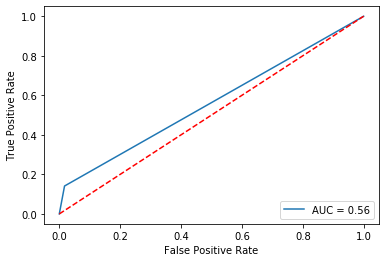

In [49]:
print('\n')
print('Model name - KNeighborsClassifier\n')
print('\n')
kn=KNeighborsClassifier(n_neighbors=15)  
kn.fit(train_x,train_y) 
pre=kn.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(kn, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - SupportVectorClassifier



Accuracy_score=  0.9078830823737821


Cross_Val_Score =  0.3069035963095462


classification_report
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      1044
           1       0.31      0.18      0.22        85

    accuracy                           0.91      1129
   macro avg       0.62      0.57      0.59      1129
weighted avg       0.89      0.91      0.90      1129



confusion matrix
 [[1010   34]
 [  70   15]]


roc_auc_score =  0.5719517692134325


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

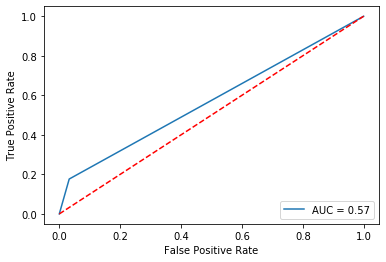

In [50]:
print('\n')
print('Model name - SupportVectorClassifier\n')
print('\n')
sv=SVC(C=10,kernel='rbf') 
sv.fit(train_x,train_y)
pre=sv.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS) 
print('\n')
sc = cross_val_score(sv, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - DecisionTreeClassifier



Accuracy_score=  0.8476527900797166


Cross_Val_Score =  0.3714024351973891


classification_report
               precision    recall  f1-score   support

           0       0.93      0.90      0.92      1044
           1       0.15      0.21      0.17        85

    accuracy                           0.85      1129
   macro avg       0.54      0.56      0.54      1129
weighted avg       0.87      0.85      0.86      1129



confusion matrix
 [[939 105]
 [ 67  18]]


roc_auc_score =  0.5555949966193374


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

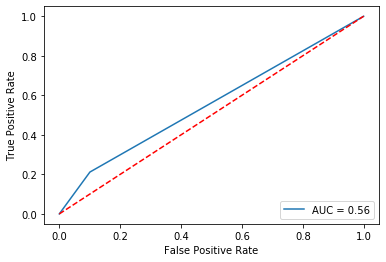

In [51]:
print('\n')
print('Model name - DecisionTreeClassifier\n')
print('\n')
dt=DecisionTreeClassifier(criterion='gini') 
dt.fit(train_x,train_y)
pre=dt.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)  
print('\n')
sc = cross_val_score(dt, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - RandomForestClassifier



Accuracy_score=  0.8724534986713907


Cross_Val_Score =  0.43166446996799096


classification_report
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      1044
           1       0.20      0.22      0.21        85

    accuracy                           0.87      1129
   macro avg       0.57      0.57      0.57      1129
weighted avg       0.88      0.87      0.88      1129



confusion matrix
 [[966  78]
 [ 66  19]]


roc_auc_score =  0.5744083840432725


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

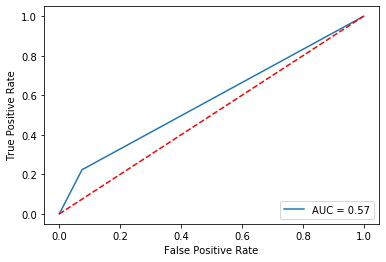

In [52]:
print('\n')
print('Model name - RandomForestClassifier\n')
print('\n')
rfc=RandomForestClassifier(criterion='gini',n_estimators=1000) 
rfc.fit(train_x,train_y) 
pre=rfc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(rfc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - GradientBoostingClassifier



Accuracy_score=  0.9238263950398583


Cross_Val_Score =  0.8309426975459736


classification_report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1044
           1       0.00      0.00      0.00        85

    accuracy                           0.92      1129
   macro avg       0.46      0.50      0.48      1129
weighted avg       0.86      0.92      0.89      1129



confusion matrix
 [[1043    1]
 [  85    0]]


roc_auc_score =  0.49952107279693486


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

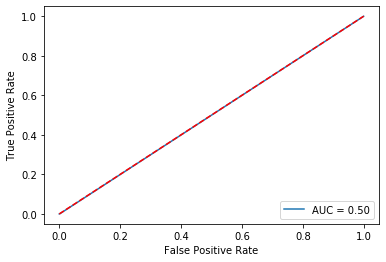

In [53]:
print('\n')
print('Model name - GradientBoostingClassifier\n')
print('\n')
gbc=GradientBoostingClassifier(learning_rate=0.001, n_estimators=900) 
gbc.fit(train_x,train_y)
pre=gbc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(gbc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - Logistic Regression



Accuracy_score=  0.9185119574844995


Cross_Val_Score =  0.626595117052658


classification_report
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      1044
           1       0.36      0.11      0.16        85

    accuracy                           0.92      1129
   macro avg       0.65      0.55      0.56      1129
weighted avg       0.89      0.92      0.90      1129



confusion matrix
 [[1028   16]
 [  76    9]]


roc_auc_score =  0.5452783412215462


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

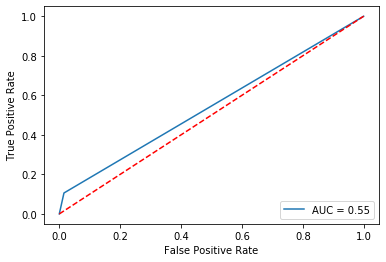

In [54]:
print('\n')
print('Model name - Logistic Regression\n')
print('\n')
lor=LogisticRegression(penalty='l2', C=15, fit_intercept=True)
lor.fit(train_x,train_y)
pre=lor.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(lor, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - AdaBoost Classifier



Accuracy_score=  0.853852967227635


Cross_Val_Score =  0.3676871901085797


classification_report
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      1044
           1       0.14      0.19      0.16        85

    accuracy                           0.85      1129
   macro avg       0.54      0.55      0.54      1129
weighted avg       0.87      0.85      0.86      1129



confusion matrix
 [[948  96]
 [ 69  16]]


roc_auc_score =  0.5481406355645707


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

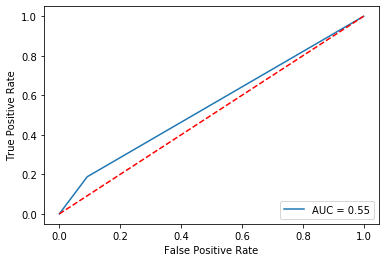

In [55]:
print('\n')
print('Model name - AdaBoost Classifier\n')
print('\n')
adc=AdaBoostClassifier(base_estimator=dt,learning_rate=0.01,n_estimators=10,algorithm='SAMME')
adc.fit(train_x,train_y)
pre=adc.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(adc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - XGBoost Classifier



Accuracy_score=  0.8857395925597874


Cross_Val_Score =  0.4892568882194189


classification_report
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1044
           1       0.22      0.20      0.21        85

    accuracy                           0.89      1129
   macro avg       0.58      0.57      0.57      1129
weighted avg       0.88      0.89      0.88      1129



confusion matrix
 [[983  61]
 [ 68  17]]


roc_auc_score =  0.5707854406130267


ROC-CURVE


Text(0.5, 0, 'False Positive Rate')

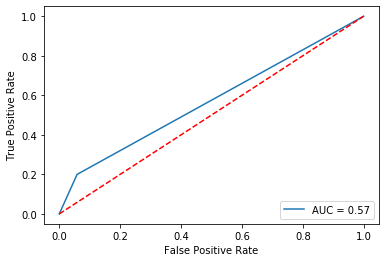

In [56]:
print('\n')
print('Model name - XGBoost Classifier\n')
print('\n')
xgb=XGBClassifier(alpha=1, max_depth=6)
xgb.fit(train_x,train_y)
pre=xgb.predict(test_x) 
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(xgb, x, y, cv=10, scoring='accuracy').mean() 
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC-CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - GaussianNB



Accuracy_score =  0.8131089459698848


Cross_Val_Score =  0.7251302328500596


classification_report
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      1044
           1       0.20      0.49      0.28        85

    accuracy                           0.81      1129
   macro avg       0.58      0.67      0.59      1129
weighted avg       0.90      0.81      0.85      1129



confusion matrix
 [[876 168]
 [ 43  42]]


roc_auc_score =  0.6665990534144692


ROC-CURVE


Text(0.5, 0, 'False Positive Rate')

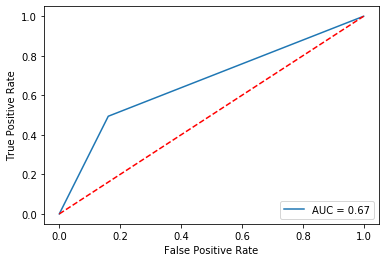

In [57]:
print('\n')
print('Model name - GaussianNB\n')
print('\n')
gnb=GaussianNB()
gnb.fit(train_x,train_y)
pre=gnb.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(gnb, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n') 
print('ROC-CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate')

In [60]:
# Here GradientBoostingClassifier is working best with an Accuracy Score of 0.9238263950398583 so I am saving the Model
import joblib 
joblib.dump(gbc, 'GradientBoostingClasssifier_Covid-19_Results.pkl')  

['GradientBoostingClasssifier_Covid-19_Results.pkl']

In [61]:
#Predicting results with GradientBoostingClassifier
print('\n')
print('Model name - GradientBoostingClassifier\n')
print('\n')
pre=gbc.predict(x)
print(pre)                     



Model name - GradientBoostingClassifier



[0 0 0 ... 0 0 0]


In [62]:
pred1 = pd.DataFrame(pre)
pred1

,0
0,0
1,0
2,0
3,0
4,0
...,...
5639,0
5640,0
5641,0
5642,0


In [63]:
pred1[0].value_counts()     # Here I can see that out of 5644 people only 10 people are Covid-19 positive, therefore the system needs much more data to make more accurate prediction.

0    5634
1      10
Name: 0, dtype: int64

In [64]:
print(pred1[0].unique())   # unique values (0 means Covid-19 negative, 1 means Covid-19 positive)

[0 1]


# Predict admission to general ward

In [65]:
df_filtered = df[df['SARS-Cov-2 exam result'] == 1]     # Filtering out positive Covid-19 cases out of all the cases
df_filtered

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
67,7,1,0,0,0,0.671398,0.290940,0.135801,0.010677,0.525133,...,0.738350,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,-0.454028,0.490988
284,16,1,1,0,0,0.831618,0.541564,-0.705840,-0.999063,1.106935,...,0.738350,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,-0.454028,0.490988
513,10,1,0,0,0,-1.617460,-1.400772,-0.102873,0.459449,-1.361315,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366
568,2,1,0,0,0,0.991838,0.792188,-0.341548,1.469188,1.653476,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366
676,15,1,0,0,0,0.534067,0.416252,0.248857,-0.550290,0.384090,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,16,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.224990,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5633,4,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.224990,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5634,15,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.224990,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5639,3,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.224990,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693


# Splitting data into target and input variables

In [66]:
df_x=df_filtered.drop('Patient addmited to regular ward (1=yes, 0=no)',axis=1)
df_x.head() 

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
67,7,1,0,0,0.671398,0.290940,0.135801,0.010677,0.525133,0.173372,...,0.738350,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,-0.454028,0.490988
284,16,1,0,0,0.831618,0.541564,-0.705840,-0.999063,1.106935,-0.645416,...,0.738350,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,-0.454028,0.490988
513,10,1,0,0,-1.617460,-1.400772,-0.102873,0.459449,-1.361315,-0.705120,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366
568,2,1,0,0,0.991838,0.792188,-0.341548,1.469188,1.653476,-0.048383,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366
676,15,1,0,0,0.534067,0.416252,0.248857,-0.550290,0.384090,-0.918346,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366


In [67]:
df_filtered.rename(columns = {'Patient addmited to regular ward (1=yes, 0=no)': 'Admit_regular_ward'}, inplace = True) # rename column into machine readable format

In [68]:
y=pd.DataFrame(df_filtered.Admit_regular_ward)
y.head() 

,Admit_regular_ward
67,0
284,1
513,0
568,0
676,0


In [69]:
print(df_x.shape)
print(y.shape) 

(558, 97)
(558, 1)


In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()                                                    # Applying Standard Scaling
x = sc.fit_transform(df_x) 
x = pd.DataFrame(x,columns=df_x.columns) 
x 

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,-0.738608,0.0,-0.120605,-0.120605,0.764500,0.361270,0.037763,0.043927,0.643129,0.216990,...,1.087054,0.067191,-0.246857,-0.236789,0.120916,0.066812,0.257297,4.784954,-0.275598,0.245442
1,1.092235,0.0,-0.120605,-0.120605,0.918583,0.608013,-0.484748,-1.081591,1.181745,-0.630590,...,1.087054,0.067191,-0.246857,-0.236789,0.120916,0.066812,0.257297,4.784954,-0.275598,0.245442
2,-0.128327,0.0,-0.120605,-0.120605,-1.436693,-1.304243,-0.110411,0.544157,-1.103295,-0.692393,...,0.535163,-0.432712,0.969797,0.727465,0.621629,0.758484,-0.358910,0.266304,0.295028,-0.626894
3,-1.755742,0.0,-0.120605,-0.120605,1.072667,0.854755,-0.258586,1.669674,1.687718,-0.012563,...,0.535163,-0.432712,0.969797,0.727465,0.621629,0.758484,-0.358910,0.266304,0.295028,-0.626894
4,0.888808,0.0,-0.120605,-0.120605,0.632429,0.484642,0.107952,-0.581360,0.512554,-0.913117,...,0.535163,-0.432712,0.969797,0.727465,0.621629,0.758484,-0.358910,0.266304,0.295028,-0.626894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,1.092235,0.0,-0.120605,-0.120605,0.786512,0.608013,-0.609527,-0.331245,0.692093,-0.268603,...,0.484992,-0.109858,-0.141061,-0.021100,-0.129441,-0.140689,0.121369,-0.660599,0.437685,-0.128417
554,-1.348889,0.0,-0.120605,-0.120605,0.786512,0.608013,-0.609527,-0.331245,0.692093,-0.268603,...,0.484992,-0.109858,-0.141061,-0.021100,-0.129441,-0.140689,0.121369,-0.660599,0.437685,-0.128417
555,0.888808,0.0,-0.120605,-0.120605,0.786512,0.608013,-0.609527,-0.331245,0.692093,-0.268603,...,0.484992,-0.109858,-0.141061,-0.021100,-0.129441,-0.140689,0.121369,-0.660599,0.437685,-0.128417
556,-1.552315,0.0,-0.120605,-0.120605,0.786512,0.608013,-0.609527,-0.331245,0.692093,-0.268603,...,0.484992,-0.109858,-0.141061,-0.021100,-0.129441,-0.140689,0.121369,-0.660599,0.437685,-0.128417


In [71]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [72]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [73]:
# as I got the highest accuracy score with respect to random state 56 in KNeighborsClassifier, so I fix the random state 56 for all the Models 
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56,test_size=0.20)  

In [74]:
print(train_x.shape,test_x.shape) 

(446, 97) (112, 97)


In [75]:
print(train_y.shape,test_y.shape)

(446, 1) (112, 1)


In [76]:
def max_accuracy_score(clf,x,y):
    max_acc_score=0
    for r_state in range(42,100):
        train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = r_state,test_size=0.20)
        clf.fit(train_x,train_y)
        pre = clf.predict(test_x) 
        acc_scr=accuracy_score(test_y,pre)
        print("accuracy score corresponding to random state ",r_state,"is",acc_scr)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state,"is",max_acc_score)
    return final_r_state         

In [77]:
kn=KNeighborsClassifier(n_neighbors=15) 
r_state=max_accuracy_score(kn,x,y)

accuracy score corresponding to random state  42 is 0.9553571428571429
accuracy score corresponding to random state  43 is 0.9196428571428571
accuracy score corresponding to random state  44 is 0.9553571428571429
accuracy score corresponding to random state  45 is 0.9464285714285714
accuracy score corresponding to random state  46 is 0.8839285714285714
accuracy score corresponding to random state  47 is 0.9017857142857143
accuracy score corresponding to random state  48 is 0.9375
accuracy score corresponding to random state  49 is 0.9375
accuracy score corresponding to random state  50 is 0.9464285714285714
accuracy score corresponding to random state  51 is 0.9642857142857143
accuracy score corresponding to random state  52 is 0.9464285714285714
accuracy score corresponding to random state  53 is 0.9107142857142857
accuracy score corresponding to random state  54 is 0.9553571428571429
accuracy score corresponding to random state  55 is 0.9642857142857143
accuracy score corresponding t



Model name - KNeighborsClassifier



Accuracy_score =  0.9821428571428571


Cross_Val_Score =  0.931948051948052


classification_report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       110
           1       0.00      0.00      0.00         2

    accuracy                           0.98       112
   macro avg       0.49      0.50      0.50       112
weighted avg       0.96      0.98      0.97       112



confusion matrix
 [[110   0]
 [  2   0]]


roc_auc_score =  0.5


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

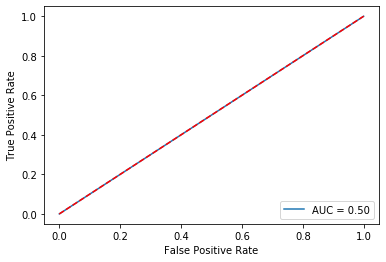

In [78]:
print('\n')
print('Model name - KNeighborsClassifier\n')
print('\n')
kn=KNeighborsClassifier(n_neighbors=15)  
kn.fit(train_x,train_y) 
pre=kn.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(kn, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate') 



Model name - SupportVectorClassifier



Accuracy_score=  0.9553571428571429


Cross_Val_Score =  0.8551623376623377


classification_report
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       110
           1       0.00      0.00      0.00         2

    accuracy                           0.96       112
   macro avg       0.49      0.49      0.49       112
weighted avg       0.96      0.96      0.96       112



confusion matrix
 [[107   3]
 [  2   0]]


roc_auc_score =  0.4863636363636364


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

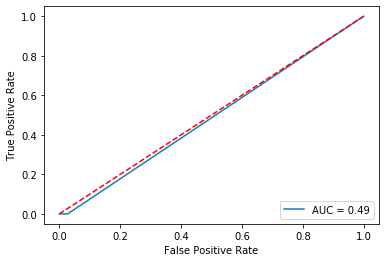

In [79]:
print('\n')
print('Model name - SupportVectorClassifier\n')
print('\n')
sv=SVC(C=10,kernel='rbf') 
sv.fit(train_x,train_y)
pre=sv.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS) 
print('\n')
sc = cross_val_score(sv, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - DecisionTreeClassifier



Accuracy_score=  0.8839285714285714


Cross_Val_Score =  0.7494805194805194


classification_report
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       110
           1       0.00      0.00      0.00         2

    accuracy                           0.88       112
   macro avg       0.49      0.45      0.47       112
weighted avg       0.96      0.88      0.92       112



confusion matrix
 [[99 11]
 [ 2  0]]


roc_auc_score =  0.45


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

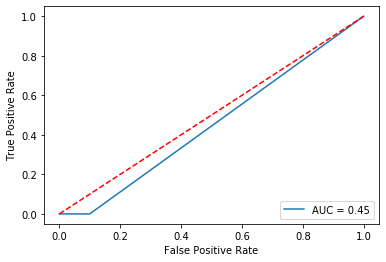

In [80]:
print('\n')
print('Model name - DecisionTreeClassifier\n')
print('\n')
dt=DecisionTreeClassifier(criterion='gini') 
dt.fit(train_x,train_y)
pre=dt.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)  
print('\n')
sc = cross_val_score(dt, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - RandomForestClassifier



Accuracy_score=  0.9464285714285714


Cross_Val_Score =  0.8748376623376621


classification_report
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       110
           1       0.00      0.00      0.00         2

    accuracy                           0.95       112
   macro avg       0.49      0.48      0.49       112
weighted avg       0.96      0.95      0.96       112



confusion matrix
 [[106   4]
 [  2   0]]


roc_auc_score =  0.4818181818181818


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

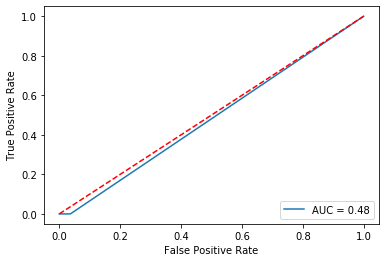

In [81]:
print('\n')
print('Model name - RandomForestClassifier\n')
print('\n')
rfc=RandomForestClassifier(criterion='gini',n_estimators=1000) 
rfc.fit(train_x,train_y) 
pre=rfc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(rfc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - GradientBoostingClassifier



Accuracy_score=  0.9821428571428571


Cross_Val_Score =  0.906948051948052


classification_report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       110
           1       0.00      0.00      0.00         2

    accuracy                           0.98       112
   macro avg       0.49      0.50      0.50       112
weighted avg       0.96      0.98      0.97       112



confusion matrix
 [[110   0]
 [  2   0]]


roc_auc_score =  0.5


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

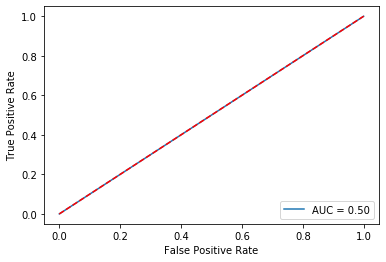

In [82]:
print('\n')
print('Model name - GradientBoostingClassifier\n')
print('\n')
gbc=GradientBoostingClassifier(learning_rate=0.001, n_estimators=900) 
gbc.fit(train_x,train_y)
pre=gbc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(gbc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - Logistic Regression



Accuracy_score=  0.9375


Cross_Val_Score =  0.7852922077922079


classification_report
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       110
           1       0.00      0.00      0.00         2

    accuracy                           0.94       112
   macro avg       0.49      0.48      0.48       112
weighted avg       0.96      0.94      0.95       112



confusion matrix
 [[105   5]
 [  2   0]]


roc_auc_score =  0.4772727272727273


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

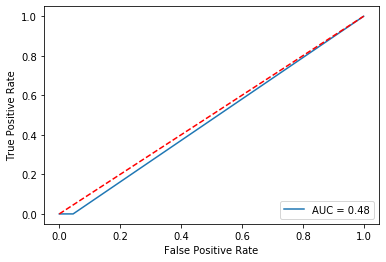

In [83]:
print('\n')
print('Model name - Logistic Regression\n')
print('\n')
lor=LogisticRegression(penalty='l2', C=15, fit_intercept=True)
lor.fit(train_x,train_y)
pre=lor.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(lor, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - AdaBoost Classifier



Accuracy_score=  0.875


Cross_Val_Score =  0.7639610389610388


classification_report
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       110
           1       0.00      0.00      0.00         2

    accuracy                           0.88       112
   macro avg       0.49      0.45      0.47       112
weighted avg       0.96      0.88      0.92       112



confusion matrix
 [[98 12]
 [ 2  0]]


roc_auc_score =  0.44545454545454544


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

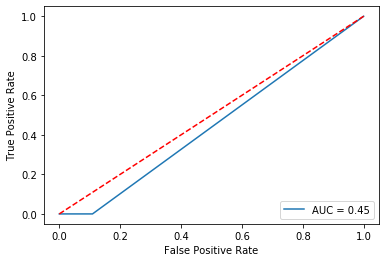

In [84]:
print('\n')
print('Model name - AdaBoost Classifier\n')
print('\n')
adc=AdaBoostClassifier(base_estimator=dt,learning_rate=0.01,n_estimators=10,algorithm='SAMME')
adc.fit(train_x,train_y)
pre=adc.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(adc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - XGBoost Classifier



Accuracy_score=  0.9553571428571429


Cross_Val_Score =  0.8550974025974025


classification_report
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       110
           1       0.00      0.00      0.00         2

    accuracy                           0.96       112
   macro avg       0.49      0.49      0.49       112
weighted avg       0.96      0.96      0.96       112



confusion matrix
 [[107   3]
 [  2   0]]


roc_auc_score =  0.4863636363636364


ROC-CURVE


Text(0.5, 0, 'False Positive Rate')

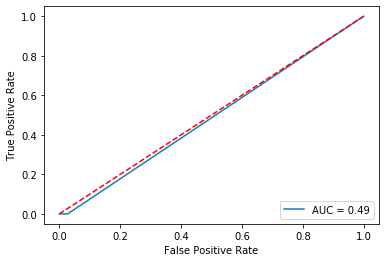

In [85]:
print('\n')
print('Model name - XGBoost Classifier\n')
print('\n')
xgb=XGBClassifier(alpha=1, max_depth=6)
xgb.fit(train_x,train_y)
pre=xgb.predict(test_x) 
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(xgb, x, y, cv=10, scoring='accuracy').mean() 
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC-CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - GaussianNB



Accuracy_score =  0.29464285714285715


Cross_Val_Score =  0.30733766233766235


classification_report
               precision    recall  f1-score   support

           0       1.00      0.28      0.44       110
           1       0.02      1.00      0.05         2

    accuracy                           0.29       112
   macro avg       0.51      0.64      0.24       112
weighted avg       0.98      0.29      0.43       112



confusion matrix
 [[31 79]
 [ 0  2]]


roc_auc_score =  0.6409090909090909


ROC-CURVE


Text(0.5, 0, 'False Positive Rate')

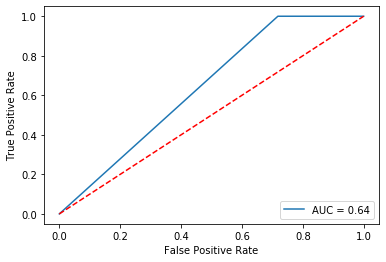

In [86]:
print('\n')
print('Model name - GaussianNB\n')
print('\n')
gnb=GaussianNB()
gnb.fit(train_x,train_y)
pre=gnb.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(gnb, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n') 
print('ROC-CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate')

In [89]:
# Here KNeighborsClassifier & GradientBoostingClassifier both are working best with an Accuracy Score of 0.9821428571428571 but CrossValidation score is more for KNeighborsClassifier so I am saving the Model with KNeighborsClassifier
import joblib
joblib.dump(xgb, 'KNeighborsClassifier_Admit_regular_ward.pkl') 

['KNeighborsClassifier_Admit_regular_ward.pkl']

In [103]:
#Predicting results with KNeighborsClassifier

print('Model name - KNeighborsClassifier\n')
print('\n')
pre2=kn.predict(x)
print(pre2)          

Model name - KNeighborsClassifier



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [104]:
pred2 = pd.DataFrame(pre2)
pred2

,0
0,0
1,0
2,0
3,0
4,0
...,...
553,0
554,0
555,0
556,0


In [105]:
pred2[0].value_counts()     # 2 is the predicted result of Covid-19 positive patients admitted to regular ward
                                  #So we see that model needs more datas for predicting more accurate result
                              # Here 1 means yes admitted to regular ward & 0 means not admitted to regular ward

0    556
1      2
Name: 0, dtype: int64

In [106]:
df_filtered['Admit_regular_ward'].value_counts() # 36 is the actual no of Covid-19 positive patients admitted to regular ward

0    522
1     36
Name: Admit_regular_ward, dtype: int64

# Predict admission to semi-intensive unit

In [107]:
df_filtered2 = df[df['SARS-Cov-2 exam result'] == 1]
df_filtered2

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
67,7,1,0,0,0,0.671398,0.290940,0.135801,0.010677,0.525133,...,0.738350,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,-0.454028,0.490988
284,16,1,1,0,0,0.831618,0.541564,-0.705840,-0.999063,1.106935,...,0.738350,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,-0.454028,0.490988
513,10,1,0,0,0,-1.617460,-1.400772,-0.102873,0.459449,-1.361315,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366
568,2,1,0,0,0,0.991838,0.792188,-0.341548,1.469188,1.653476,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366
676,15,1,0,0,0,0.534067,0.416252,0.248857,-0.550290,0.384090,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,16,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.224990,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5633,4,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.224990,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5634,15,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.224990,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5639,3,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.224990,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693


# Splitting Data into Input and Target Variables

In [108]:
df_x=df_filtered2.drop('Patient addmited to semi-intensive unit (1=yes, 0=no)',axis=1)
df_x.head() 

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
67,7,1,0,0,0.671398,0.290940,0.135801,0.010677,0.525133,0.173372,...,0.738350,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,-0.454028,0.490988
284,16,1,1,0,0.831618,0.541564,-0.705840,-0.999063,1.106935,-0.645416,...,0.738350,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,-0.454028,0.490988
513,10,1,0,0,-1.617460,-1.400772,-0.102873,0.459449,-1.361315,-0.705120,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366
568,2,1,0,0,0.991838,0.792188,-0.341548,1.469188,1.653476,-0.048383,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366
676,15,1,0,0,0.534067,0.416252,0.248857,-0.550290,0.384090,-0.918346,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366


In [109]:
df_filtered2.rename(columns = {'Patient addmited to semi-intensive unit (1=yes, 0=no)': 'Target'}, inplace = True) #rename column to machine readable format

In [110]:
y=pd.DataFrame(df_filtered2.Target)
y.head() 
#df_y=pd.DataFrame(df1.income)
#df_y.head() 
#y=df_filtered2.iloc[:,] 

,Target
67,0
284,0
513,0
568,0
676,0


In [111]:
print(df_x.shape)
print(y.shape) 

(558, 97)
(558, 1)


In [112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()                                       # Applying Standard Scaling
x = sc.fit_transform(df_x) 
x = pd.DataFrame(x,columns=df_x.columns) 
x

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,-0.738608,0.0,-0.262613,-0.120605,0.764500,0.361270,0.037763,0.043927,0.643129,0.216990,...,1.087054,0.067191,-0.246857,-0.236789,0.120916,0.066812,0.257297,4.784954,-0.275598,0.245442
1,1.092235,0.0,3.807887,-0.120605,0.918583,0.608013,-0.484748,-1.081591,1.181745,-0.630590,...,1.087054,0.067191,-0.246857,-0.236789,0.120916,0.066812,0.257297,4.784954,-0.275598,0.245442
2,-0.128327,0.0,-0.262613,-0.120605,-1.436693,-1.304243,-0.110411,0.544157,-1.103295,-0.692393,...,0.535163,-0.432712,0.969797,0.727465,0.621629,0.758484,-0.358910,0.266304,0.295028,-0.626894
3,-1.755742,0.0,-0.262613,-0.120605,1.072667,0.854755,-0.258586,1.669674,1.687718,-0.012563,...,0.535163,-0.432712,0.969797,0.727465,0.621629,0.758484,-0.358910,0.266304,0.295028,-0.626894
4,0.888808,0.0,-0.262613,-0.120605,0.632429,0.484642,0.107952,-0.581360,0.512554,-0.913117,...,0.535163,-0.432712,0.969797,0.727465,0.621629,0.758484,-0.358910,0.266304,0.295028,-0.626894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,1.092235,0.0,-0.262613,-0.120605,0.786512,0.608013,-0.609527,-0.331245,0.692093,-0.268603,...,0.484992,-0.109858,-0.141061,-0.021100,-0.129441,-0.140689,0.121369,-0.660599,0.437685,-0.128417
554,-1.348889,0.0,-0.262613,-0.120605,0.786512,0.608013,-0.609527,-0.331245,0.692093,-0.268603,...,0.484992,-0.109858,-0.141061,-0.021100,-0.129441,-0.140689,0.121369,-0.660599,0.437685,-0.128417
555,0.888808,0.0,-0.262613,-0.120605,0.786512,0.608013,-0.609527,-0.331245,0.692093,-0.268603,...,0.484992,-0.109858,-0.141061,-0.021100,-0.129441,-0.140689,0.121369,-0.660599,0.437685,-0.128417
556,-1.552315,0.0,-0.262613,-0.120605,0.786512,0.608013,-0.609527,-0.331245,0.692093,-0.268603,...,0.484992,-0.109858,-0.141061,-0.021100,-0.129441,-0.140689,0.121369,-0.660599,0.437685,-0.128417


In [113]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [114]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [115]:
# as I got the highest accuracy score with respect to random state 45 in KNeighborsClassifier, so I fix the random state 45 for all the Models 
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=45,test_size=0.20)  

In [116]:
print(train_x.shape,test_x.shape) 

(446, 97) (112, 97)


In [117]:
print(train_y.shape,test_y.shape)

(446, 1) (112, 1)


In [118]:
def max_accuracy_score(clf,x,y):
    max_acc_score=0
    for r_state in range(42,100):
        train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = r_state,test_size=0.20)
        clf.fit(train_x,train_y)
        pre = clf.predict(test_x) 
        acc_scr=accuracy_score(test_y,pre)
        print("accuracy score corresponding to random state ",r_state,"is",acc_scr)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state,"is",max_acc_score)
    return final_r_state         

In [119]:
kn=KNeighborsClassifier(n_neighbors=15) 
r_state=max_accuracy_score(kn,x,y) 

accuracy score corresponding to random state  42 is 0.9732142857142857
accuracy score corresponding to random state  43 is 0.9732142857142857
accuracy score corresponding to random state  44 is 0.9910714285714286
accuracy score corresponding to random state  45 is 1.0
accuracy score corresponding to random state  46 is 0.9910714285714286
accuracy score corresponding to random state  47 is 1.0
accuracy score corresponding to random state  48 is 1.0
accuracy score corresponding to random state  49 is 0.9910714285714286
accuracy score corresponding to random state  50 is 0.9821428571428571
accuracy score corresponding to random state  51 is 0.9732142857142857
accuracy score corresponding to random state  52 is 0.9910714285714286
accuracy score corresponding to random state  53 is 0.9910714285714286
accuracy score corresponding to random state  54 is 0.9821428571428571
accuracy score corresponding to random state  55 is 0.9910714285714286
accuracy score corresponding to random state  56 is



Model name - KNeighborsClassifier



Accuracy_score =  1.0


Cross_Val_Score =  0.9857142857142858


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       112

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



confusion matrix
 [[112]]


roc_auc_score =  nan


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

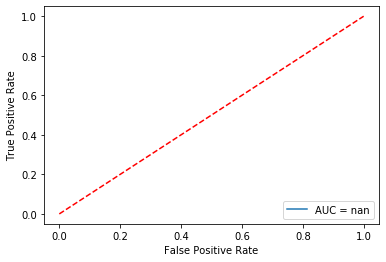

In [120]:
print('\n')
print('Model name - KNeighborsClassifier\n')
print('\n')
kn=KNeighborsClassifier(n_neighbors=15)  
kn.fit(train_x,train_y) 
pre=kn.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(kn, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - SupportVectorClassifier



Accuracy_score=  0.9910714285714286


Cross_Val_Score =  0.9642857142857142


classification_report
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       112
           1       0.00      0.00      0.00         0

    accuracy                           0.99       112
   macro avg       0.50      0.50      0.50       112
weighted avg       1.00      0.99      1.00       112



confusion matrix
 [[111   1]
 [  0   0]]


roc_auc_score =  nan


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

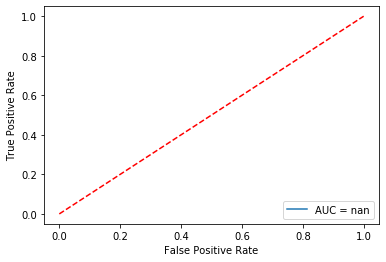

In [121]:
print('\n')
print('Model name - SupportVectorClassifier\n')
print('\n')
sv=SVC(C=10,kernel='rbf') 
sv.fit(train_x,train_y)
pre=sv.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS) 
print('\n')
sc = cross_val_score(sv, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - DecisionTreeClassifier



Accuracy_score=  0.9910714285714286


Cross_Val_Score =  0.9303571428571429


classification_report
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       112
           1       0.00      0.00      0.00         0

    accuracy                           0.99       112
   macro avg       0.50      0.50      0.50       112
weighted avg       1.00      0.99      1.00       112



confusion matrix
 [[111   1]
 [  0   0]]


roc_auc_score =  nan


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

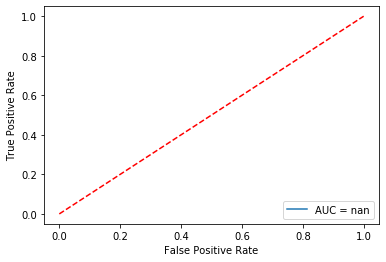

In [122]:
print('\n')
print('Model name - DecisionTreeClassifier\n')
print('\n')
dt=DecisionTreeClassifier(criterion='gini') 
dt.fit(train_x,train_y)
pre=dt.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)  
print('\n')
sc = cross_val_score(dt, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - RandomForestClassifier



Accuracy_score=  1.0


Cross_Val_Score =  0.9660714285714285


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       112

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



confusion matrix
 [[112]]


roc_auc_score =  nan


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

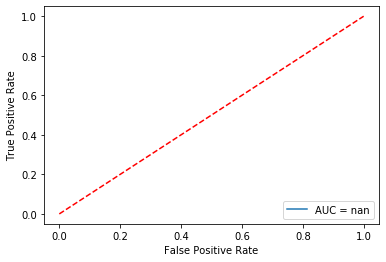

In [123]:
print('\n')
print('Model name - RandomForestClassifier\n')
print('\n')
rfc=RandomForestClassifier(criterion='gini',n_estimators=1000) 
rfc.fit(train_x,train_y) 
pre=rfc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(rfc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - GradientBoostingClassifier



Accuracy_score=  1.0


Cross_Val_Score =  0.9660714285714285


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       112

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



confusion matrix
 [[112]]


roc_auc_score =  nan


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

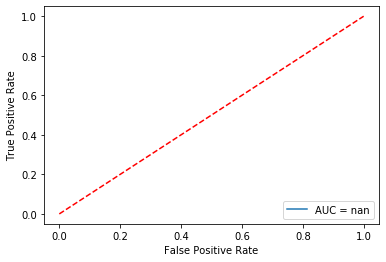

In [124]:
print('\n')
print('Model name - GradientBoostingClassifier\n')
print('\n')
gbc=GradientBoostingClassifier(learning_rate=0.001, n_estimators=900) 
gbc.fit(train_x,train_y)
pre=gbc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(gbc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - Logistic Regression



Accuracy_score=  0.9821428571428571


Cross_Val_Score =  0.9571428571428571


classification_report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       112
           1       0.00      0.00      0.00         0

    accuracy                           0.98       112
   macro avg       0.50      0.49      0.50       112
weighted avg       1.00      0.98      0.99       112



confusion matrix
 [[110   2]
 [  0   0]]


roc_auc_score =  nan


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

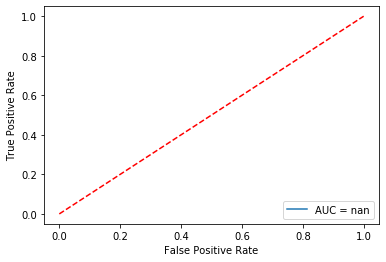

In [125]:
print('\n')
print('Model name - Logistic Regression\n')
print('\n')
lor=LogisticRegression(penalty='l2', C=15, fit_intercept=True)
lor.fit(train_x,train_y)
pre=lor.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(lor, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - AdaBoost Classifier



Accuracy_score=  0.9910714285714286


Cross_Val_Score =  0.8714285714285713


classification_report
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       112
           1       0.00      0.00      0.00         0

    accuracy                           0.99       112
   macro avg       0.50      0.50      0.50       112
weighted avg       1.00      0.99      1.00       112



confusion matrix
 [[111   1]
 [  0   0]]


roc_auc_score =  nan


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

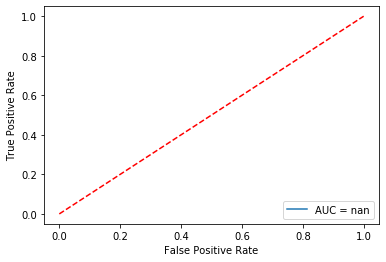

In [126]:
print('\n')
print('Model name - AdaBoost Classifier\n')
print('\n')
adc=AdaBoostClassifier(base_estimator=dt,learning_rate=0.01,n_estimators=10,algorithm='SAMME')
adc.fit(train_x,train_y)
pre=adc.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(adc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - XGBoost Classifier



Accuracy_score=  1.0


Cross_Val_Score =  0.9803571428571429


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       112

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



confusion matrix
 [[112]]


roc_auc_score =  nan


ROC-CURVE


Text(0.5, 0, 'False Positive Rate')

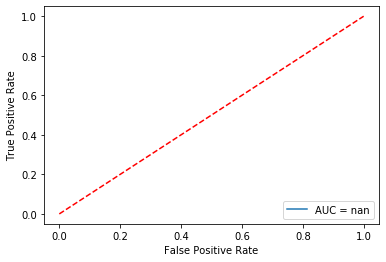

In [127]:
print('\n')
print('Model name - XGBoost Classifier\n')
print('\n')
xgb=XGBClassifier(alpha=1, max_depth=6)
xgb.fit(train_x,train_y)
pre=xgb.predict(test_x) 
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(xgb, x, y, cv=10, scoring='accuracy').mean() 
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC-CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - GaussianNB



Accuracy_score =  0.5803571428571429


Cross_Val_Score =  0.6665909090909091


classification_report
               precision    recall  f1-score   support

           0       1.00      0.58      0.73       112
           1       0.00      0.00      0.00         0

    accuracy                           0.58       112
   macro avg       0.50      0.29      0.37       112
weighted avg       1.00      0.58      0.73       112



confusion matrix
 [[65 47]
 [ 0  0]]


roc_auc_score =  nan


ROC-CURVE


Text(0.5, 0, 'False Positive Rate')

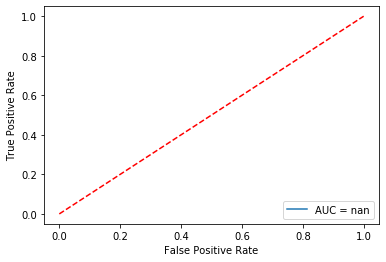

In [128]:
print('\n')
print('Model name - GaussianNB\n')
print('\n')
gnb=GaussianNB()
gnb.fit(train_x,train_y)
pre=gnb.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(gnb, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n') 
print('ROC-CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate')

In [131]:
# Here KNeighborsClassifier is working best with an Accuracy Score of 1.0 and cross validation score of 0.9857142857142858 so I am saving the Model
import joblib
joblib.dump(kn, 'KNeighborsClassifier_addmit_semi-intensive-unit.pkl')  

['KNeighborsClassifier_addmit_semi-intensive-unit.pkl']

In [132]:
#Predicting results with KNeighborsClassifier
print('\n')
print('Model name - KNeighborsClassifier\n')
print('\n')
pre3=kn.predict(x)
print(pre3)          



Model name - KNeighborsClassifier



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [133]:
pred3 = pd.DataFrame(pre3)
pred3

,0
0,0
1,0
2,0
3,0
4,0
...,...
553,0
554,0
555,0
556,0


In [134]:
pred3[0].value_counts()   # Here model predicted that no one got addmitted in semi intensive unit so machine needs more data for more correct predictions

0    558
Name: 0, dtype: int64

In [135]:
df_filtered2['Target'].value_counts() #in actual dataset there are 8 Covid19 positive patients addmitted to semi intensive unit 

0    550
1      8
Name: Target, dtype: int64

# Predicting patient addmited to intensive care unit

In [136]:
df_filtered3 = df[df['SARS-Cov-2 exam result'] == 1]
df_filtered3

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
67,7,1,0,0,0,0.671398,0.290940,0.135801,0.010677,0.525133,...,0.738350,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,-0.454028,0.490988
284,16,1,1,0,0,0.831618,0.541564,-0.705840,-0.999063,1.106935,...,0.738350,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,-0.454028,0.490988
513,10,1,0,0,0,-1.617460,-1.400772,-0.102873,0.459449,-1.361315,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366
568,2,1,0,0,0,0.991838,0.792188,-0.341548,1.469188,1.653476,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366
676,15,1,0,0,0,0.534067,0.416252,0.248857,-0.550290,0.384090,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,16,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.224990,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5633,4,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.224990,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5634,15,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.224990,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5639,3,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.224990,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693


In [137]:
df_filtered3

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
67,7,1,0,0,0,0.671398,0.290940,0.135801,0.010677,0.525133,...,0.738350,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,-0.454028,0.490988
284,16,1,1,0,0,0.831618,0.541564,-0.705840,-0.999063,1.106935,...,0.738350,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,-0.454028,0.490988
513,10,1,0,0,0,-1.617460,-1.400772,-0.102873,0.459449,-1.361315,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366
568,2,1,0,0,0,0.991838,0.792188,-0.341548,1.469188,1.653476,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366
676,15,1,0,0,0,0.534067,0.416252,0.248857,-0.550290,0.384090,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,16,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.224990,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5633,4,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.224990,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5634,15,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.224990,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693
5639,3,1,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,0.224990,-0.202859,-0.011817,0.113120,-0.074619,-0.066989,-0.159955,-0.597097,0.335586,0.182693


# Splitting data into Target and input variables

In [138]:
df_x=df_filtered3.drop('Patient addmited to intensive care unit (1=yes, 0=no)',axis=1)
df_x.head() 

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
67,7,1,0,0,0.671398,0.290940,0.135801,0.010677,0.525133,0.173372,...,0.738350,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,-0.454028,0.490988
284,16,1,1,0,0.831618,0.541564,-0.705840,-0.999063,1.106935,-0.645416,...,0.738350,-0.046104,-0.091579,-0.092106,0.077435,0.056332,-0.042277,2.841856,-0.454028,0.490988
513,10,1,0,0,-1.617460,-1.400772,-0.102873,0.459449,-1.361315,-0.705120,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366
568,2,1,0,0,0.991838,0.792188,-0.341548,1.469188,1.653476,-0.048383,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366
676,15,1,0,0,0.534067,0.416252,0.248857,-0.550290,0.384090,-0.918346,...,0.267769,-0.488706,0.825690,0.825376,0.381541,0.467403,-0.575750,-0.011744,0.177663,-0.228366


In [139]:
df_filtered3.rename(columns = {'Patient addmited to intensive care unit (1=yes, 0=no)': 'Output'}, inplace = True) # converting target variable column into machine readable format

In [140]:
y=pd.DataFrame(df_filtered3.Output)
y.head() 

,Output
67,0
284,0
513,0
568,0
676,0


In [141]:
print(df_x.shape)
print(y.shape) 

(558, 97)
(558, 1)


In [142]:
from sklearn.preprocessing import StandardScaler               # Applying standard scaler
sc = StandardScaler()
x = sc.fit_transform(df_x) 
x = pd.DataFrame(x,columns=df_x.columns) 
x 

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,-0.738608,0.0,-0.262613,-0.120605,0.764500,0.361270,0.037763,0.043927,0.643129,0.216990,...,1.087054,0.067191,-0.246857,-0.236789,0.120916,0.066812,0.257297,4.784954,-0.275598,0.245442
1,1.092235,0.0,3.807887,-0.120605,0.918583,0.608013,-0.484748,-1.081591,1.181745,-0.630590,...,1.087054,0.067191,-0.246857,-0.236789,0.120916,0.066812,0.257297,4.784954,-0.275598,0.245442
2,-0.128327,0.0,-0.262613,-0.120605,-1.436693,-1.304243,-0.110411,0.544157,-1.103295,-0.692393,...,0.535163,-0.432712,0.969797,0.727465,0.621629,0.758484,-0.358910,0.266304,0.295028,-0.626894
3,-1.755742,0.0,-0.262613,-0.120605,1.072667,0.854755,-0.258586,1.669674,1.687718,-0.012563,...,0.535163,-0.432712,0.969797,0.727465,0.621629,0.758484,-0.358910,0.266304,0.295028,-0.626894
4,0.888808,0.0,-0.262613,-0.120605,0.632429,0.484642,0.107952,-0.581360,0.512554,-0.913117,...,0.535163,-0.432712,0.969797,0.727465,0.621629,0.758484,-0.358910,0.266304,0.295028,-0.626894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,1.092235,0.0,-0.262613,-0.120605,0.786512,0.608013,-0.609527,-0.331245,0.692093,-0.268603,...,0.484992,-0.109858,-0.141061,-0.021100,-0.129441,-0.140689,0.121369,-0.660599,0.437685,-0.128417
554,-1.348889,0.0,-0.262613,-0.120605,0.786512,0.608013,-0.609527,-0.331245,0.692093,-0.268603,...,0.484992,-0.109858,-0.141061,-0.021100,-0.129441,-0.140689,0.121369,-0.660599,0.437685,-0.128417
555,0.888808,0.0,-0.262613,-0.120605,0.786512,0.608013,-0.609527,-0.331245,0.692093,-0.268603,...,0.484992,-0.109858,-0.141061,-0.021100,-0.129441,-0.140689,0.121369,-0.660599,0.437685,-0.128417
556,-1.552315,0.0,-0.262613,-0.120605,0.786512,0.608013,-0.609527,-0.331245,0.692093,-0.268603,...,0.484992,-0.109858,-0.141061,-0.021100,-0.129441,-0.140689,0.121369,-0.660599,0.437685,-0.128417


In [143]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [144]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [145]:
# as I got the highest accuracy score with respect to random state 43 in KNeighborsClassifier, so I fix the random state 43 for all the Models 
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=43,test_size=0.20)  

In [146]:
print(train_x.shape,test_x.shape) 

(446, 97) (112, 97)


In [147]:
print(train_y.shape,test_y.shape)

(446, 1) (112, 1)


In [148]:
def max_accuracy_score(clf,x,y):
    max_acc_score=0
    for r_state in range(42,100):
        train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = r_state,test_size=0.20)
        clf.fit(train_x,train_y)
        pre = clf.predict(test_x) 
        acc_scr=accuracy_score(test_y,pre)
        print("accuracy score corresponding to random state ",r_state,"is",acc_scr)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state,"is",max_acc_score)
    return final_r_state         

In [149]:
kn=KNeighborsClassifier(n_neighbors=15) 
r_state=max_accuracy_score(kn,x,y) 

accuracy score corresponding to random state  42 is 0.9732142857142857
accuracy score corresponding to random state  43 is 1.0
accuracy score corresponding to random state  44 is 0.9910714285714286
accuracy score corresponding to random state  45 is 1.0
accuracy score corresponding to random state  46 is 0.9910714285714286
accuracy score corresponding to random state  47 is 0.9910714285714286
accuracy score corresponding to random state  48 is 0.9732142857142857
accuracy score corresponding to random state  49 is 0.9821428571428571
accuracy score corresponding to random state  50 is 1.0
accuracy score corresponding to random state  51 is 1.0
accuracy score corresponding to random state  52 is 0.9642857142857143
accuracy score corresponding to random state  53 is 0.9732142857142857
accuracy score corresponding to random state  54 is 0.9821428571428571
accuracy score corresponding to random state  55 is 0.9642857142857143
accuracy score corresponding to random state  56 is 1.0
accuracy s



Model name - KNeighborsClassifier



Accuracy_score =  1.0


Cross_Val_Score =  0.9857142857142858


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       112

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



confusion matrix
 [[112]]


roc_auc_score =  nan


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

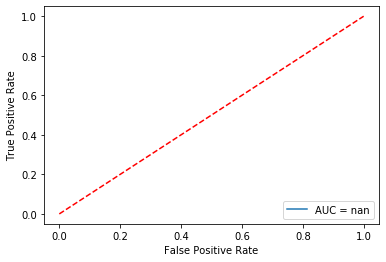

In [150]:
print('\n')
print('Model name - KNeighborsClassifier\n')
print('\n')
kn=KNeighborsClassifier(n_neighbors=15)  
kn.fit(train_x,train_y) 
pre=kn.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(kn, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - SupportVectorClassifier



Accuracy_score=  1.0


Cross_Val_Score =  0.9714285714285713


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       112

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



confusion matrix
 [[112]]


roc_auc_score =  nan


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

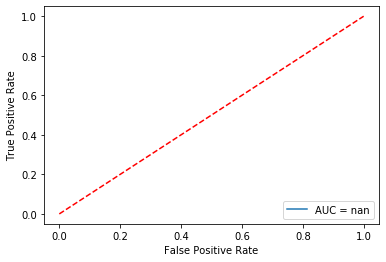

In [151]:
print('\n')
print('Model name - SupportVectorClassifier\n')
print('\n')
sv=SVC(C=10,kernel='rbf') 
sv.fit(train_x,train_y)
pre=sv.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS) 
print('\n')
sc = cross_val_score(sv, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - DecisionTreeClassifier



Accuracy_score=  0.9821428571428571


Cross_Val_Score =  0.7956818181818182


classification_report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       112
           1       0.00      0.00      0.00         0

    accuracy                           0.98       112
   macro avg       0.50      0.49      0.50       112
weighted avg       1.00      0.98      0.99       112



confusion matrix
 [[110   2]
 [  0   0]]


roc_auc_score =  nan


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

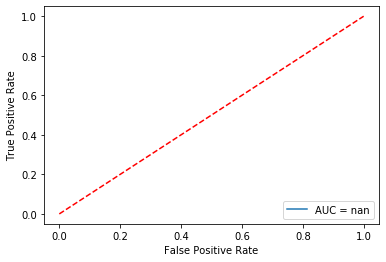

In [152]:
print('\n')
print('Model name - DecisionTreeClassifier\n')
print('\n')
dt=DecisionTreeClassifier(criterion='gini') 
dt.fit(train_x,train_y)
pre=dt.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)  
print('\n')
sc = cross_val_score(dt, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - RandomForestClassifier



Accuracy_score=  1.0


Cross_Val_Score =  0.9696428571428571


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       112

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



confusion matrix
 [[112]]


roc_auc_score =  nan


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

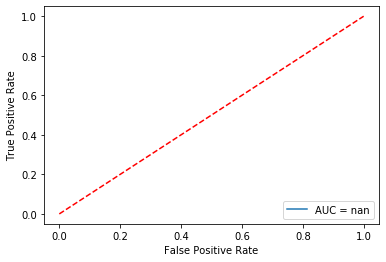

In [153]:
print('\n')
print('Model name - RandomForestClassifier\n')
print('\n')
rfc=RandomForestClassifier(criterion='gini',n_estimators=1000) 
rfc.fit(train_x,train_y) 
pre=rfc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(rfc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - GradientBoostingClassifier



Accuracy_score=  1.0


Cross_Val_Score =  0.8857142857142858


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       112

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



confusion matrix
 [[112]]


roc_auc_score =  nan


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

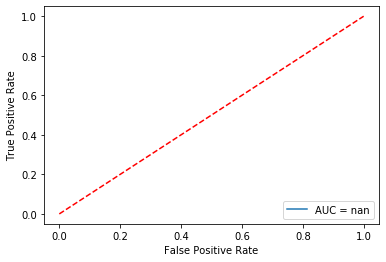

In [154]:
print('\n')
print('Model name - GradientBoostingClassifier\n')
print('\n')
gbc=GradientBoostingClassifier(learning_rate=0.001, n_estimators=900) 
gbc.fit(train_x,train_y)
pre=gbc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(gbc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - Logistic Regression



Accuracy_score=  0.9910714285714286


Cross_Val_Score =  0.9246103896103894


classification_report
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       112
           1       0.00      0.00      0.00         0

    accuracy                           0.99       112
   macro avg       0.50      0.50      0.50       112
weighted avg       1.00      0.99      1.00       112



confusion matrix
 [[111   1]
 [  0   0]]


roc_auc_score =  nan


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

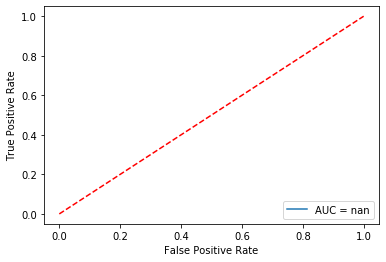

In [155]:
print('\n')
print('Model name - Logistic Regression\n')
print('\n')
lor=LogisticRegression(penalty='l2', C=15, fit_intercept=True)
lor.fit(train_x,train_y)
pre=lor.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(lor, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - AdaBoost Classifier



Accuracy_score=  0.9821428571428571


Cross_Val_Score =  0.7961363636363636


classification_report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       112
           1       0.00      0.00      0.00         0

    accuracy                           0.98       112
   macro avg       0.50      0.49      0.50       112
weighted avg       1.00      0.98      0.99       112



confusion matrix
 [[110   2]
 [  0   0]]


roc_auc_score =  nan


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

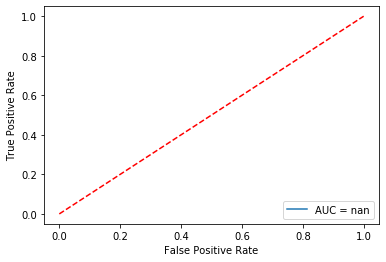

In [156]:
print('\n')
print('Model name - AdaBoost Classifier\n')
print('\n')
adc=AdaBoostClassifier(base_estimator=dt,learning_rate=0.01,n_estimators=10,algorithm='SAMME')
adc.fit(train_x,train_y)
pre=adc.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(adc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - XGBoost Classifier



Accuracy_score=  1.0


Cross_Val_Score =  0.9821428571428571


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       112

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



confusion matrix
 [[112]]


roc_auc_score =  nan


ROC-CURVE


Text(0.5, 0, 'False Positive Rate')

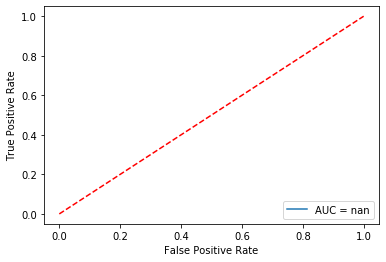

In [157]:
print('\n')
print('Model name - XGBoost Classifier\n')
print('\n')
xgb=XGBClassifier(alpha=1, max_depth=6)
xgb.fit(train_x,train_y)
pre=xgb.predict(test_x) 
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(xgb, x, y, cv=10, scoring='accuracy').mean() 
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC-CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - GaussianNB



Accuracy_score =  0.8125


Cross_Val_Score =  0.8427922077922076


classification_report
               precision    recall  f1-score   support

           0       1.00      0.81      0.90       112
           1       0.00      0.00      0.00         0

    accuracy                           0.81       112
   macro avg       0.50      0.41      0.45       112
weighted avg       1.00      0.81      0.90       112



confusion matrix
 [[91 21]
 [ 0  0]]


roc_auc_score =  nan


ROC-CURVE


Text(0.5, 0, 'False Positive Rate')

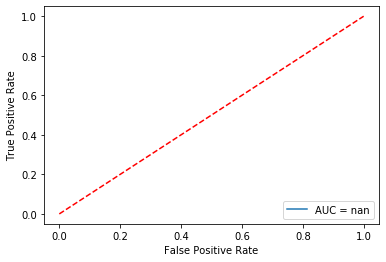

In [158]:
print('\n')
print('Model name - GaussianNB\n')
print('\n')
gnb=GaussianNB()
gnb.fit(train_x,train_y)
pre=gnb.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(gnb, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n') 
print('ROC-CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate')

In [161]:
# Here KNeighborsClassifier is working best with an Accuracy Score of 1.0 and cross validation score of 0.9857142857142858 so I am saving the Model
import joblib
joblib.dump(kn, 'KNeighborsClassifier_admit_intensive-care-unit.pkl')  

['KNeighborsClassifier_admit_intensive-care-unit.pkl']

In [162]:
#Predicting results with KNeighborsClassifier
print('\n')
print('Model name - KNeighborsClassifier\n')
print('\n')
pre4=kn.predict(x)
print(pre4)          



Model name - KNeighborsClassifier



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [163]:
pred4 = pd.DataFrame(pre4)
pred4

,0
0,0
1,0
2,0
3,0
4,0
...,...
553,0
554,0
555,0
556,0


In [164]:
pred4[0].value_counts()          # Here model predicted that no one got addmitted in intensive care unit so machine need more data for more correct predictions

0    558
Name: 0, dtype: int64

In [165]:
df_filtered3['Output'].value_counts() #in actual dataset there are 8 Covid19 positive patients addmitted to intensive care unit 

0    550
1      8
Name: Output, dtype: int64